In [34]:
from fbprophet import Prophet
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

import json

%matplotlib inline

In [35]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19issues.json')]
issues_df = DataFrame(list_of_issues_dict_data)
wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]

In [37]:
labels = wrangled_issues_df.groupby(['created_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'created_at':'ds'},inplace=True)
m = Prophet(yearly_seasonality=True)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.0.


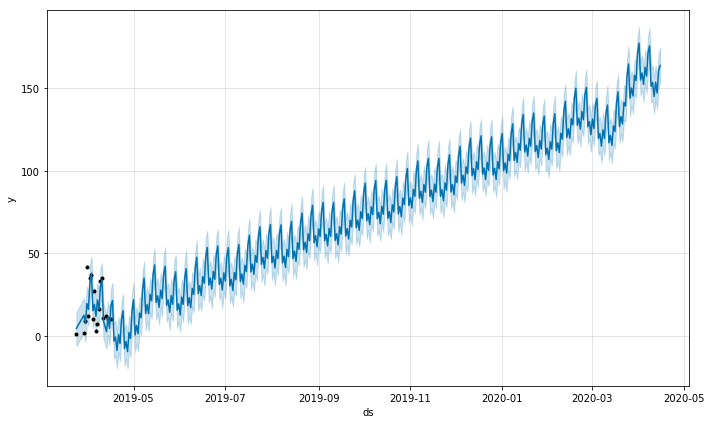

In [38]:
fig1 = m.plot(forecast)
# 3.  Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.

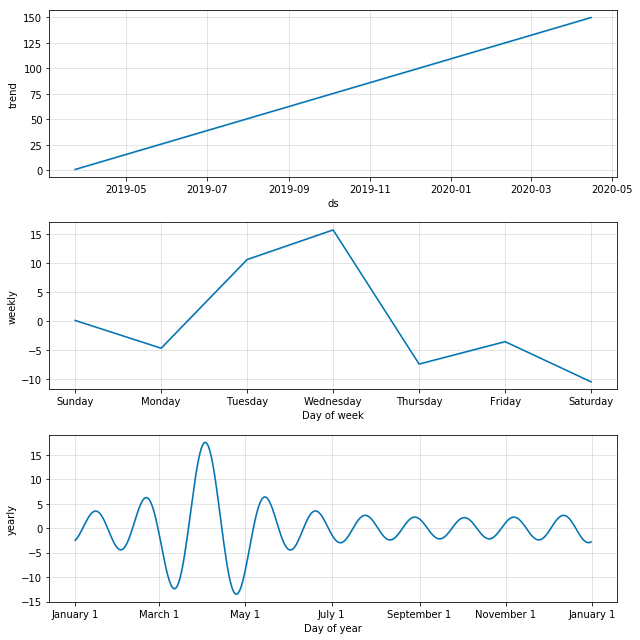

In [39]:
fig2 = m.plot_components(forecast)

In [9]:
# 1.  The day of the week maximum number of issues created is Wednesday

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.


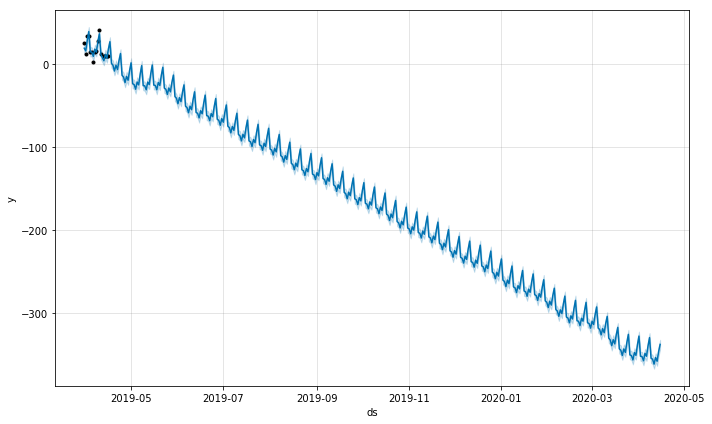

In [40]:
labels = wrangled_issues_df.groupby(['closed_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'closed_at':'ds'},inplace=True)
m = Prophet(yearly_seasonality=True,)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

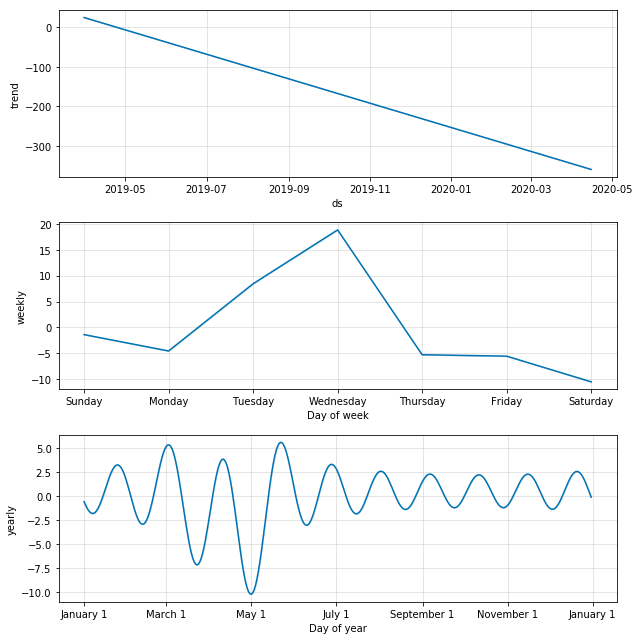

In [41]:
fig2 = m.plot_components(forecast)
# 4.  Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly
# seasonality of the time series. If you include holidays, you’ll see those here, too.

In [ ]:
# 2.  The day of the week maximum number of issues closed is Wednesday

In [43]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19pulls.json')]
issues_df = DataFrame(list_of_issues_dict_data)
wrangled_issues_df = issues_df[['Author','pulled_at']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.0.


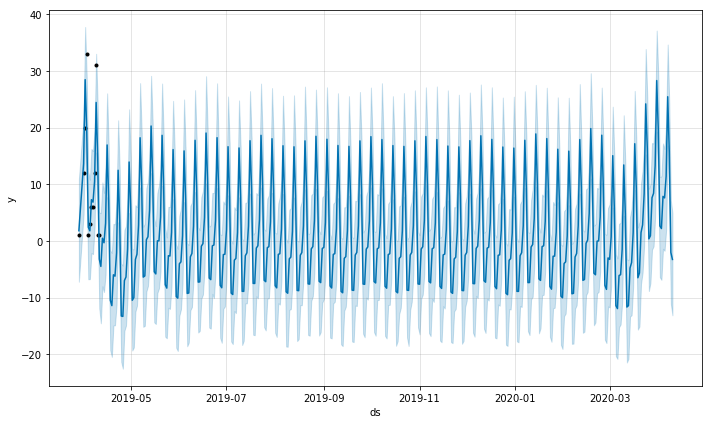

In [44]:
labels = wrangled_issues_df.groupby(['pulled_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'pulled_at':'ds'},inplace=True)
m = Prophet(weekly_seasonality=True,yearly_seasonality=True)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

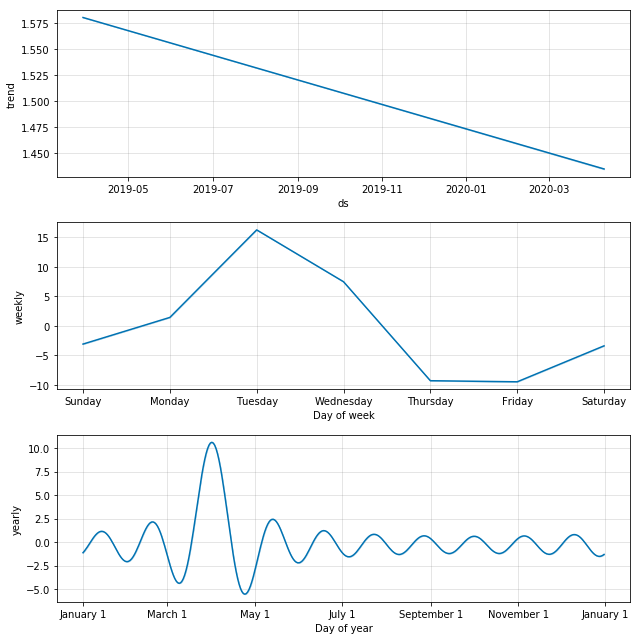

In [45]:
fig2 = m.plot_components(forecast)
# 5.  Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,
# you’ll see those here, too.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.


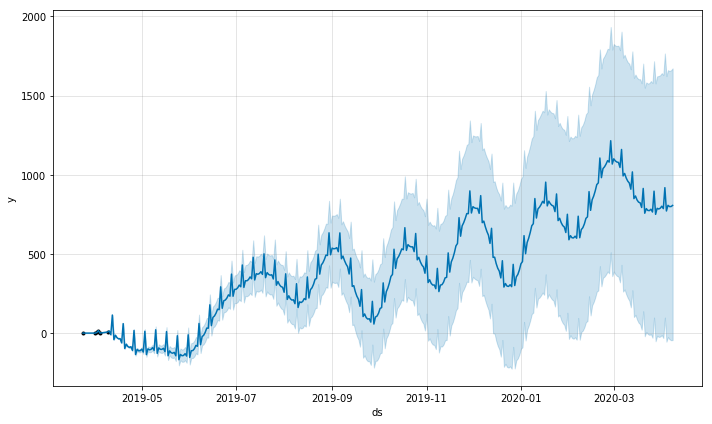

In [47]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19commits.json')]
issues_df = DataFrame(list_of_issues_dict_data)
wrangled_issues_df = issues_df[['Author','commited_at']]
labels = wrangled_issues_df.groupby(['commited_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'commited_at':'ds'},inplace=True)
m = Prophet(weekly_seasonality=True,yearly_seasonality=True)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

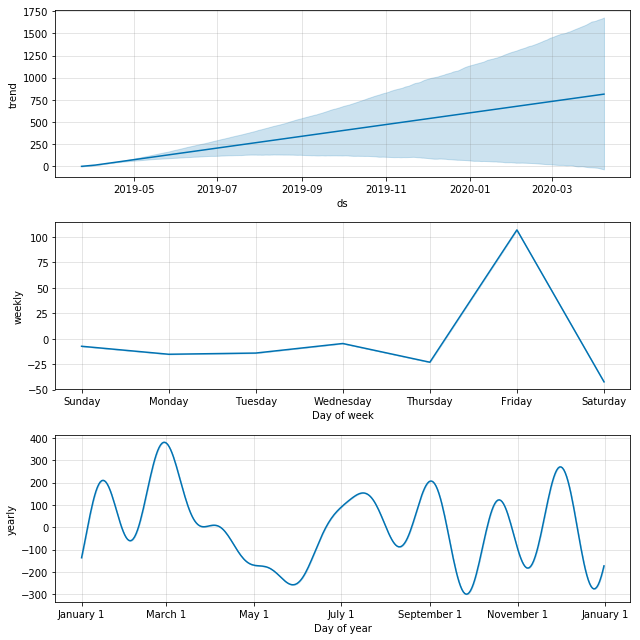

In [48]:
fig2 = m.plot_components(forecast)
# 6.  Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,
# you’ll see those here, too.